In [1]:
import zarr
from skimage.morphology import opening, remove_small_objects, closing, rectangle, disk, dilation, erosion
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops_table
from tqdm import tqdm
import numpy as np

In [2]:
z1 = zarr.open('/Users/rl627/Repository/Phage_MMLT_test/ABCD_lineage_tracking/masks/masks_lane_1.zarr', mode='r')

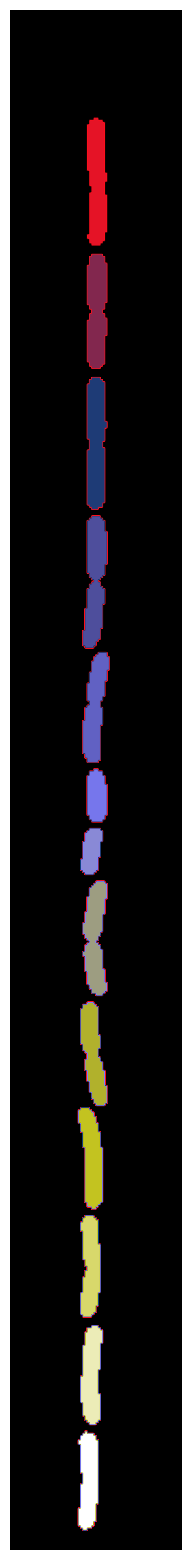

In [15]:
fig=plt.figure(figsize=(10, 20))
plt.imshow(z1[110, 2, 0, :, :], cmap='gist_stern')
plt.axis('off')
plt.show()

In [38]:
mask = z1[110, 3, 0, :, :]
mask = mask.astype(bool)

filtered = remove_small_objects(mask, min_size=30)

width = int(mask.shape[1]/10)
height = int(mask.shape[1]/25)
X, Y = np.ogrid[0:width*2+1, 0:height*2+1]

footprint1 = (1./4 * (X - width)**2 + (Y - height)**2 < height**2).astype(np.uint8)
sep = erosion(filtered, footprint1)

labels = dilation(label(sep, connectivity=1), footprint1)
# labels = label(filtered, connectivity=1)


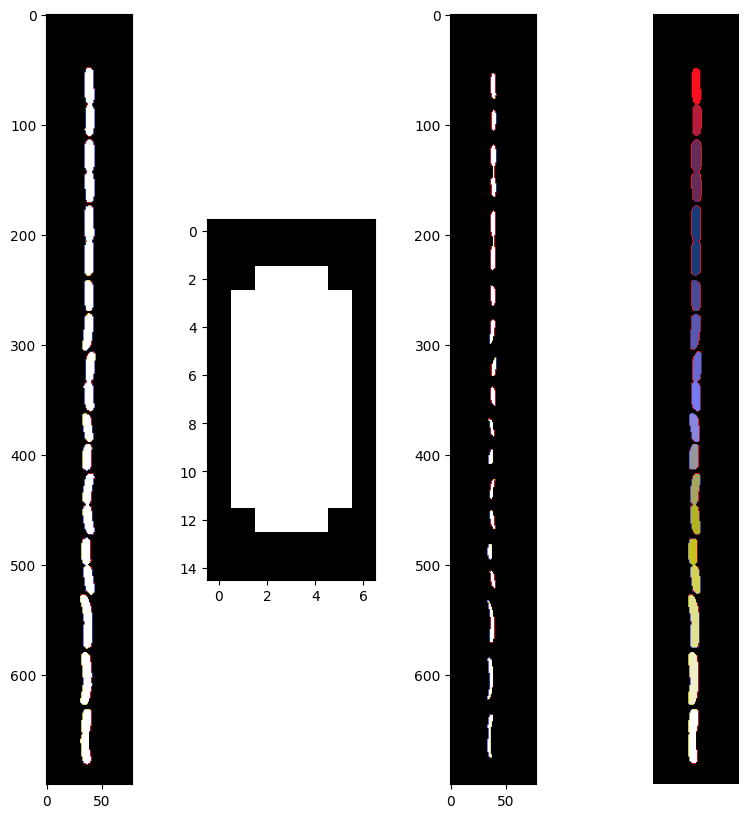

In [39]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(mask, cmap='gist_stern')
plt.subplot(1, 4, 2)
plt.imshow(footprint1, cmap='gist_stern')
plt.subplot(1, 4, 3)
plt.imshow(sep, cmap='gist_stern')
plt.subplot(1, 4, 4)
plt.imshow(labels, cmap='gist_stern')
plt.axis('off')
plt.show()